## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## Import Data

In [2]:
Travel = pd.read_csv('C:/Users/Quy/Documents/Travel.csv')

## Data Wrangling 

In [3]:
TravelDrop = Travel.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [4]:
TravelDrop.describe()


,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.0000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,202527.763808,0.193072,37.231831,1.663275,15.584787,2.949370,3.741521,3.578488,3.2953,0.295300,3.060804,0.612161,1.223595,23178.464147
std,1409.439133,0.394757,9.174521,0.920640,8.398142,0.718818,1.006786,0.795031,1.8563,0.456233,1.363064,0.487317,0.852685,4506.614622
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.0000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201320.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.0000,0.000000,2.000000,0.000000,1.000000,20751.000000
50%,202603.500000,0.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.0000,0.000000,3.000000,1.000000,1.000000,22418.000000
75%,203748.250000,0.000000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.0000,1.000000,4.000000,1.000000,2.000000,25301.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.0000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [5]:
TravelDrop.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [6]:
TravelDrop['NumberOfTrips'].value_counts()

2.0     1267
3.0      993
1.0      467
4.0      422
5.0      396
6.0      283
7.0      193
8.0      103
20.0       1
19.0       1
22.0       1
21.0       1
Name: NumberOfTrips, dtype: int64

Majority of people take 2 to 3 trips. rarely anyone take 19 trips and more.

<AxesSubplot:>

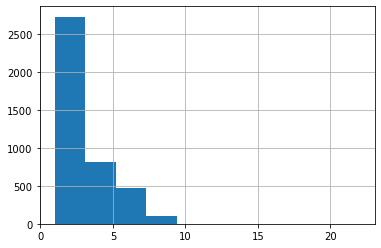

In [7]:
TravelDrop['NumberOfTrips'].hist()

In [8]:
TravelDrop['NumberOfPersonVisiting'].value_counts()

3    2078
2    1089
4     930
1      28
5       3
Name: NumberOfPersonVisiting, dtype: int64

Most groups travel with 2 to 3 persons. very few customers travel in 5 and a small portion travel alone.

<AxesSubplot:>

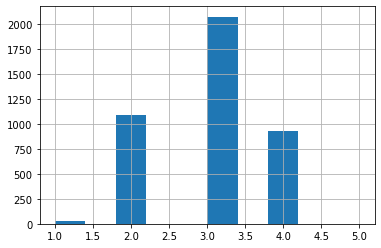

In [9]:
TravelDrop['NumberOfPersonVisiting'].hist()

<AxesSubplot:>

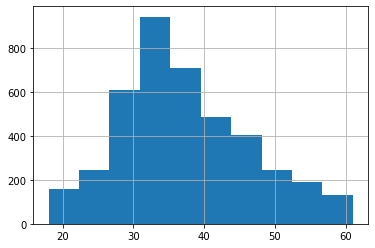

In [10]:
TravelDrop['Age'].hist()

In [11]:
TravelDrop['Age'].value_counts()

36.0    215
35.0    214
31.0    188
30.0    188
34.0    187
33.0    178
32.0    177
37.0    177
38.0    171
29.0    164
39.0    145
41.0    137
28.0    135
27.0    125
40.0    124
42.0    118
43.0    107
46.0    104
45.0     96
26.0     91
44.0     89
50.0     74
25.0     63
47.0     63
51.0     60
49.0     57
48.0     55
52.0     55
53.0     52
55.0     52
54.0     51
23.0     46
24.0     46
22.0     42
59.0     40
21.0     39
20.0     36
56.0     34
58.0     30
19.0     28
60.0     27
57.0     25
18.0     14
61.0      9
Name: Age, dtype: int64

Transforming Age into Age Group
 0:19  Teen
20:29  Young Adult
30:39  Adult
40:49  Middle Age
50:65  Senior

### Add Age.Group Column

In [12]:
bins = [10, 19, 30, 40, 50, 60, 70, 100]

In [13]:
Labels = ['Under 19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

In [14]:
TravelDrop['AgeRange'] = pd.cut(TravelDrop.Age, bins, labels = Labels,include_lowest = True)

<ipython-input-14-5d67e0746a6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TravelDrop['AgeRange'] = pd.cut(TravelDrop.Age, bins, labels = Labels,include_lowest = True)


In [15]:
TravelDrop['AgeRange'].value_counts()

30-39       1776
20-29        975
40-49        900
50-59        426
Under 19      42
60-69          9
70+            0
Name: AgeRange, dtype: int64

# Independent Chi-Square

## Test Assumptions and Run the Analysis

In [16]:
TravelDrop_crosstab = pd.crosstab(TravelDrop['AgeRange'], TravelDrop['NumberOfTrips'])

In [17]:
TravelDrop_crosstab

NumberOfTrips,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,19.0,20.0,21.0,22.0
AgeRange,,,,,,,,,,,,
Under 19,3,29,10,0,0,0,0,0,0,0,0,0
20-29,99,393,339,34,26,28,35,20,1,0,0,0
30-39,201,558,425,160,181,126,79,43,0,1,1,1
40-49,99,206,156,143,121,91,56,28,0,0,0,0
50-59,65,77,63,85,67,36,21,12,0,0,0,0
60-69,0,4,0,0,1,2,2,0,0,0,0,0


In order to pass the assumption, we have to drop AgeRange Under 19 and 60-69 as well as trip above 8

Drop rows with Age under 19 and over 59

In [18]:
TravelDrop.drop(TravelDrop[TravelDrop['Age'] < 20].index, inplace=True)

C:\Users\Quy\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
TravelDrop.drop(TravelDrop[TravelDrop['Age'] > 59].index, inplace=True)

C:\Users\Quy\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Drop rows with NumberofTrips higher than 8

In [20]:
TravelDrop.drop(TravelDrop[TravelDrop['NumberOfTrips'] > 8].index, inplace=True)

C:\Users\Quy\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
TravelDrop['AgeRange'].value_counts()

30-39       1773
20-29        974
40-49        900
50-59        399
Under 19       0
60-69          0
70+            0
Name: AgeRange, dtype: int64

In [22]:
TravelDrop_crosstab = pd.crosstab(TravelDrop['AgeRange'], TravelDrop['NumberOfTrips'])

In [23]:
TravelDrop_crosstab

NumberOfTrips,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
AgeRange,,,,,,,,
20-29,99,393,339,34,26,28,35,20
30-39,201,558,425,160,181,126,79,43
40-49,99,206,156,143,121,91,56,28
50-59,61,70,63,84,59,32,19,11


While we exam only visitors from 20 to 59 years old who make under 8 trips, our data pass the assumptions since the expected frequencies for each cell is higher than 5 entries per cell.

## Running the Independent Chi-Square

In [24]:
stats.chi2_contingency(TravelDrop_crosstab)

(390.99905341448664,
 6.74059031970561e-70,
 21,
 array([[110.73652991, 295.37765695, 236.63914978, 101.34799802,
          93.16312407,  66.68264953,  45.4982699 ,  24.55462185],
        [201.57686604, 537.68437963, 430.76099852, 184.48665348,
         169.58749382, 121.3843302 ,  82.82179931,  44.69747899],
        [102.32328225, 272.93623332, 218.66040534,  93.64804745,
          86.08502224,  61.61641127,  42.04152249,  22.68907563],
        [ 45.3633218 , 121.0017301 ,  96.93944637,  41.51730104,
          38.16435986,  27.316609  ,  18.6384083 ,  10.05882353]]))

The first value is your Chi-Square statistic, which is 390.99905341448664.
The second value is associated p value, which is 6.74059031970561e-70.
Looking at these values, There is a significant relationship between NumberOfTrips and AgeRange. Neither lipstick nor lip gloss is pricier or cheaper than the other.

# Line Charts 

In [43]:
TravelDrop.groupby(by="AgeRange").NumberOfTrips.mean()

AgeRange
Under 19         NaN
20-29       2.814168
30-39       3.265651
40-49       3.686667
50-59       3.593985
60-69            NaN
70+              NaN
Name: NumberOfTrips, dtype: float64

On average, the younger age group from 20-39 take less trip than age group from 40-59. Possible big impact is income and available travel time.  As people grow older, they are more established in their career.  Therefore, they accumulate more paid vacation time along with stable source of income.